In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def func(x, y, x_line):
  W = np.linalg.pinv(x)@y
  w_0 = [1.0,1.0]
  W_add = np.c_[w_0, W]
  print(W_add)
  #(4.18),(4.19)
  a = - ((W_add[0,1]-W_add[1,1])/(W_add[0,2]-W_add[1,2]))
  b = - (W_add[0,0]-W_add[1,0])/(W_add[0,2]-W_add[1,2])
  #(4.13)
  return a * x_line + b

[[1.         0.26532003 0.60912976]
 [1.         0.59230347 0.18514236]]
[[ 1.          0.21120401  0.07677028]
 [ 1.          0.30459604 -0.66283124]]


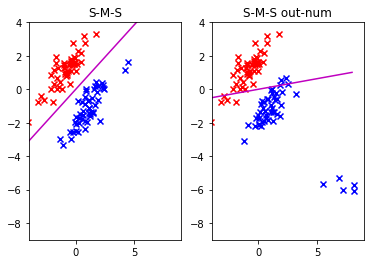

In [19]:
# 平均座標
mu_red = [-1,1]
mu_blue = [1,-1]
# 共分散行列
cov = [[1.2,1], [1,1.2]]

x_red, y_red = np.random.multivariate_normal(mu_red, cov, 50).T
x_blue, y_blue = np.random.multivariate_normal(mu_blue, cov, 50).T

x = np.vstack((x_red, x_blue)).T
y = np.vstack((y_red, y_blue)).T
# 外れ値追加
mu_b_out = [7,-6]
cov2 = [[1,0],[0,1]]
x_blue2, y_blue2 = np.random.multivariate_normal(mu_blue, cov, 45).T
x_b_out, y_b_out = np.random.multivariate_normal(mu_b_out, cov2, 5).T
x_blue3, y_blue3 = np.r_[x_blue2, x_b_out], np.r_[y_blue2, y_b_out]

x2 = np.vstack((x_red, x_blue3)).T
y2 = np.vstack((y_red, y_blue3)).T

# plot
plt.subplot(1,2,1)
x_line = np.linspace(-4,8,1000)
plt.plot(x_line,func(x,y, x_line), 'm-')
plt.scatter(x_red, y_red, color="r", marker='x')
plt.scatter(x_blue, y_blue, color="b", marker='x')
plt.xlim(-4.0, 9.0)
plt.ylim(-9.0, 4.0)
plt.title("S-M-S")

plt.subplot(1,2,2)
x_line = np.linspace(-4,8,1000)
plt.plot(x_line, func(x2, y2, x_line), 'm-')
plt.scatter(x_red, y_red, color="r", marker="x")
plt.scatter(x_blue3, y_blue3, color="b", marker="x")
plt.xlim(-4.0, 9.0)
plt.ylim(-9.0, 4.0)
plt.title("S-M-S out-num")
plt.show()